# Exploratory Data Analysis

## Import Libaries 

In [1]:
import numpy as np 
import pandas as pd

### User defined function

## Load the dataset 

In [2]:
def replace_nans(dataframe):
    '''
        Description: Checks for nan in a df and replaces it with the mean of non-nan values in the df
        Input: str: dataframe name
        output: nil, it replaces all nan values with the mean
    
    '''
    # load the dataframe into a variable
    df = dataframe.copy()
    
    mean = df.mean(skipna=True)
   
    #replace nan with average 
    # Replace NaN values in 'age' column with the calculated mean
    df.fillna(mean, inplace=True)
    
    return df  

In [3]:
# define the path to the dataset
path = 'dataset/water_potability.csv'

In [4]:
# Load dataset
dataset = pd.read_csv(path)

In [5]:
# Visualize loaded data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
# Print first 10 elements
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Preprocess Data

In [7]:
'''
    To see if a colum has nan, use
    np.isnan(var)
'''

'\n    To see if a colum has nan, use\n    np.isnan(var)\n'

In [8]:
# Replace nan in ph
dataFrame_ph = dataset['ph']
df_ph = replace_nans(dataFrame_ph)

# replace dataset['ph'] with df_ph
# Replace the 'ph' column in dataset with values from df
dataset['ph'] = df_ph

In [9]:
# Replace nan in Sulfate
dataFrame_Sulfate = dataset['Sulfate']
df_Sulfate = replace_nans(dataFrame_Sulfate)

# replace dataset['ph'] with df_Sulfate
# Replace the 'ph' column in dataset with values from df
dataset['Sulfate'] = df_Sulfate

In [10]:
# Replace nan in Trihalomethanes
dataFrame_Trihalomethanes = dataset['Trihalomethanes']
df_Trihalomethanes = replace_nans(dataFrame_Trihalomethanes)

# replace dataset['ph'] with df_Trihalomethanes
# Replace the 'ph' column in dataset with values from df
dataset['Trihalomethanes'] = df_Trihalomethanes

In [11]:
# View dataset to confirm all missing values have been replaced 
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Visualize Portability against PH

Matplotlib is building the font cache; this may take a moment.


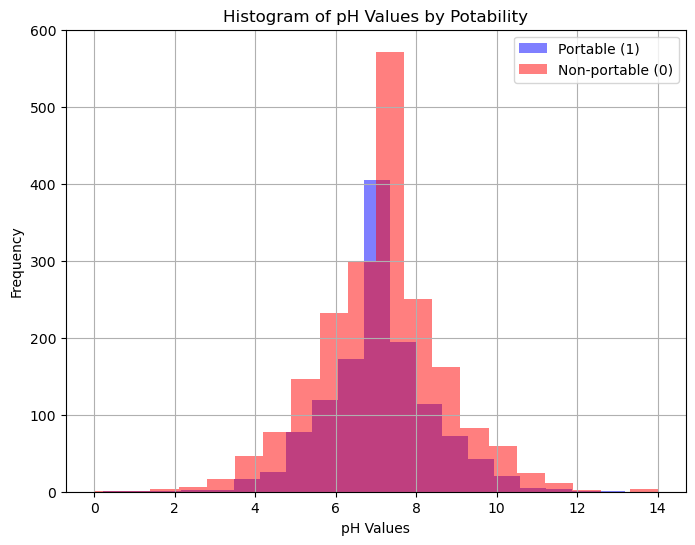

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Separate pH values for portable and non-portable instances
portable_ph = dataset[dataset['Potability'] == 1]['ph']
non_portable_ph = dataset[dataset['Potability'] == 0]['ph']

# Plotting histograms for both categories
plt.figure(figsize=(8, 6))
plt.hist(portable_ph, bins=20, alpha=0.5, label='Portable (1)', color='blue')
plt.hist(non_portable_ph, bins=20, alpha=0.5, label='Non-portable (0)', color='red')

plt.xlabel('pH Values')
plt.ylabel('Frequency')
plt.title('Histogram of pH Values by Potability')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'dataset' is your DataFrame containing the features and the 'Potability' column as the target

# Separate features and target variable
X = dataset.drop('Potability', axis=1)  # Features
y = dataset['Potability']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by scaling (optional, but often beneficial for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656


Confusion Matrix:
[[412   0]
 [244   0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
## using gradient boost

!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.8 MB 3.3 MB/s eta 0:00:30
   ---------------------------------------- 0.2/99.8 MB 3.0 MB/s eta 0:00:33
   ---------------------------------------- 0.3/99.8 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 0.4/99.8 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.4/99.8 MB 2.1 MB/s eta 0:00:47
   ---------------------------------------- 0.5/99.8 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.6/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.7/99.8 MB 2.1 MB/s eta 0:00:48
   ----------------------------

In [15]:
import xgboost as xgb

# Assuming 'dataset' is your DataFrame containing the features and the 'Potability' column as the target

# Separate features and target variable
X = dataset.drop('Potability', axis=1)  # Features
y = dataset['Potability']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Classifier
model = xgb.XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ModuleNotFoundError: No module named 'xgboost'

In [16]:
importance = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [17]:
correlation_matrix = dataset.corr()
print(correlation_matrix['Potability'].sort_values(ascending=False))


Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006960
Turbidity          0.001581
ph                -0.003287
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020619
Organic_carbon    -0.030001
Name: Potability, dtype: float64


In [18]:
#Regression analysis

In [19]:
import statsmodels.api as sm

# Assuming 'dataset' is your DataFrame containing the 'Potability' and 'ph' columns

# Adding a constant term for the intercept
X = sm.add_constant(dataset['ph'])  

# Dependent variable
y = dataset['Potability']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Potability   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03537
Date:                Fri, 01 Dec 2023   Prob (F-statistic):              0.851
Time:                        20:49:13   Log-Likelihood:                -2296.6
No. Observations:                3276   AIC:                             4597.
Df Residuals:                    3274   BIC:                             4609.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3978      0.042      9.485      0.0

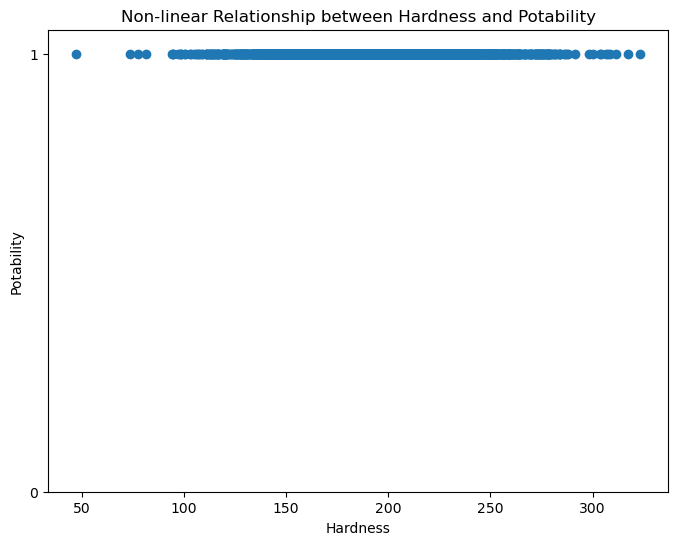

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame containing 'Potability' and 'Hardness'

# Generate synthetic data with a non-linear relationship between 'Hardness' and 'Potability'
np.random.seed(1)
hardness = dataset['Hardness']
# Creating a non-linear relationship using a sigmoid function
log_odds = hardness * 0.2 - 2
probability = 1 / (1 + np.exp(-log_odds))
potability = np.random.binomial(1, probability)

# Plotting the non-linear relationship
plt.figure(figsize=(8, 6))
plt.scatter(hardness, potability)
plt.xlabel('Hardness')
plt.ylabel('Potability')
plt.title('Non-linear Relationship between Hardness and Potability')
plt.yticks([0, 1])
plt.show()

In [21]:
# Assuming 'dataset' is your DataFrame containing 'Chloramines', 'Hardness', and 'Potability'

# Create a new feature by combining 'Chloramines' and 'Hardness'
dataset['Chloramines_Hardness'] = dataset['Chloramines'] * dataset['Hardness']

# Now, you can assess the relationship of 'Chloramines_Hardness' with 'Potability'

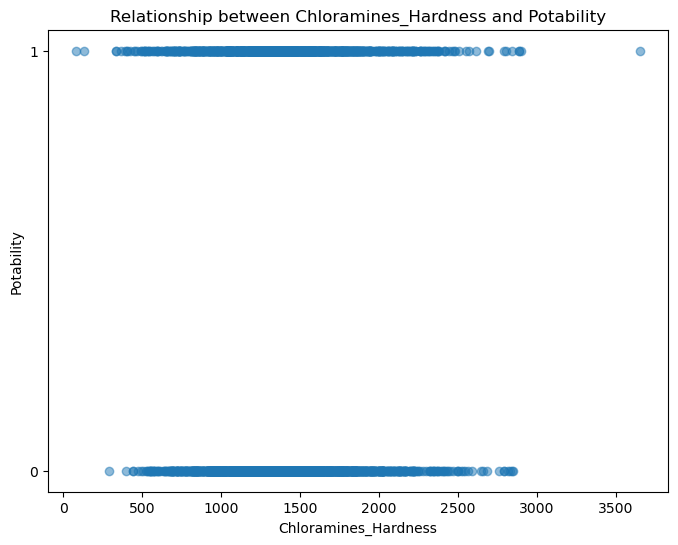

In [22]:
# Scatter plot of 'Chloramines_Hardness' against 'Potability'
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Chloramines_Hardness'], dataset['Potability'], alpha=0.5)
plt.xlabel('Chloramines_Hardness')
plt.ylabel('Potability')
plt.title('Relationship between Chloramines_Hardness and Potability')
plt.yticks([0, 1])
plt.show()